<a href="https://colab.research.google.com/github/respinar1/GoogleColaboratory/blob/main/WageGapPerIndustry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Files:

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import matplotlib.pyplot as plt

Get CVS files from local drive:

In [3]:
from google.colab import files
uploaded = files.upload()

Saving inc_occ_gender.csv to inc_occ_gender.csv


Convert CVS into Python DataFrame:

In [55]:
DataSet = pd.read_csv(io.BytesIO(uploaded['inc_occ_gender.csv']), index_col='Occupation')
DataSet

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
Occupation,,,,,,
ALL OCCUPATIONS,109080,809,60746,895,48334,726
MANAGEMENT,12480,1351,7332,1486,5147,1139
Chief executives,1046,2041,763,2251,283,1836
General and operations managers,823,1260,621,1347,202,1002
Legislators,8,Na,5,Na,4,Na
...,...,...,...,...,...,...
Pumping station operators,18,Na,17,Na,1,Na
Refuse and recyclable material collectors,72,501,66,496,6,Na
Mine shuttle car operators,0,Na,0,Na,0,Na


In [68]:
DataSet = DataSet.drop('ALL OCCUPATIONS')

Replaces all 'Na' with zeroes (string)

In [69]:
for x in DataSet:
  for y in DataSet[x]:
    if y == 'Na':
      DataSet[x].replace({'Na': '0'}, inplace=True)

DataSet

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap
Occupation,,,,,,,
MANAGEMENT,12480,1351,7332,1486,5147,1139,-25.68
Chief executives,1046,2041,763,2251,283,1836,-20.33
General and operations managers,823,1260,621,1347,202,1002,-27.38
Marketing and sales managers,948,1462,570,1603,378,1258,-23.60
Administrative services managers,170,1191,96,1451,73,981,-39.46
...,...,...,...,...,...,...,...
TRANSPORTATION,6953,646,5998,679,955,494,-28.64
Bus drivers,323,615,184,681,138,572,-17.72
Driver/sales workers and truck drivers,2687,747,2582,751,105,632,-15.93


Convert the String numbers in Integer numbers

In [70]:
for x in DataSet:
  if x == 'Occupation':
    continue
  else:
    DataSet[x] = pd.to_numeric(DataSet[x])

DataSet

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap
Occupation,,,,,,,
MANAGEMENT,12480,1351,7332,1486,5147,1139,-25.68
Chief executives,1046,2041,763,2251,283,1836,-20.33
General and operations managers,823,1260,621,1347,202,1002,-27.38
Marketing and sales managers,948,1462,570,1603,378,1258,-23.60
Administrative services managers,170,1191,96,1451,73,981,-39.46
...,...,...,...,...,...,...,...
TRANSPORTATION,6953,646,5998,679,955,494,-28.64
Bus drivers,323,615,184,681,138,572,-17.72
Driver/sales workers and truck drivers,2687,747,2582,751,105,632,-15.93


Calculating Wage Gap:



In [71]:
WageGap = 100*(DataSet['F_weekly']-DataSet['M_weekly'])/DataSet['All_weekly']
DataSet['WageGap'] = WageGap
DataSet = DataSet.round({'WageGap': 2})
DataSet

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap
Occupation,,,,,,,
MANAGEMENT,12480,1351,7332,1486,5147,1139,-25.68
Chief executives,1046,2041,763,2251,283,1836,-20.33
General and operations managers,823,1260,621,1347,202,1002,-27.38
Marketing and sales managers,948,1462,570,1603,378,1258,-23.60
Administrative services managers,170,1191,96,1451,73,981,-39.46
...,...,...,...,...,...,...,...
TRANSPORTATION,6953,646,5998,679,955,494,-28.64
Bus drivers,323,615,184,681,138,572,-17.72
Driver/sales workers and truck drivers,2687,747,2582,751,105,632,-15.93


Largest Employer Data

In [72]:
DataSet.nlargest(1,['All_workers'])

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap
Occupation,,,,,,,
OFFICE,13894,656,3961,693,9933,646,-7.16


Industry with the largest Wage Gap

In [73]:
DataSet.nsmallest(1,['WageGap'])

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap
Occupation,,,,,,,
"Securities, commodities, and financial services sales agents",211,1155,146,1461,65,767,-60.09


Clearly an issue with the Data that shows Female employees dont make anything on a weekly median bases. Have to remove zero values in (All_weekly, M_weekly, and F_weekly)

In [74]:
for x in DataSet:
  if x == 'Occupation':
    continue
  else:
    for y in DataSet[x]:
      if y == 0:
        indexNmbr = DataSet[DataSet[x] == 0].index
        DataSet.drop(indexNmbr, inplace=True)
DataSet

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap
Occupation,,,,,,,
MANAGEMENT,12480,1351,7332,1486,5147,1139,-25.68
Chief executives,1046,2041,763,2251,283,1836,-20.33
General and operations managers,823,1260,621,1347,202,1002,-27.38
Marketing and sales managers,948,1462,570,1603,378,1258,-23.60
Administrative services managers,170,1191,96,1451,73,981,-39.46
...,...,...,...,...,...,...,...
TRANSPORTATION,6953,646,5998,679,955,494,-28.64
Bus drivers,323,615,184,681,138,572,-17.72
Driver/sales workers and truck drivers,2687,747,2582,751,105,632,-15.93


The industry with the highest wage gap:

In [75]:
DataSet.nsmallest(3,['WageGap'])

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap
Occupation,,,,,,,
"Securities, commodities, and financial services sales agents",211,1155,146,1461,65,767,-60.09
LEGAL,1346,1391,624,1877,722,1135,-53.34
Personal financial advisors,407,1419,248,1738,159,1033,-49.68


The industry with the lowest wage gap:

In [76]:
DataSet.nlargest(3,['WageGap'])

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap
Occupation,,,,,,,
"Wholesale and retail buyers, except farm products",142,926,73,886,69,985,10.69
Data entry keyers,223,619,55,589,169,638,7.92
"Office clerks, general",929,620,156,609,773,622,2.10


The industry with the most men vs women:

In [77]:
MenDataSet = DataSet.loc[DataSet['M_workers'] > DataSet['F_workers']]

In [78]:
MenDataSet.nlargest(3, ['M_workers'])

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap
Occupation,,,,,,,
MANAGEMENT,12480,1351,7332,1486,5147,1139,-25.68
TRANSPORTATION,6953,646,5998,679,955,494,-28.64
CONSTRUCTION,5722,749,5586,751,137,704,-6.28


In [79]:
GenderDiff = MenDataSet['M_workers'] - MenDataSet['F_workers']
for x in GenderDiff.sort_values(ascending=False).index[:3]:
  print(MenDataSet.loc[x])

All_workers    5722.00
All_weekly      749.00
M_workers      5586.00
M_weekly        751.00
F_workers       137.00
F_weekly        704.00
WageGap          -6.28
Name: CONSTRUCTION, dtype: float64
All_workers    6953.00
All_weekly      646.00
M_workers      5998.00
M_weekly        679.00
F_workers       955.00
F_weekly        494.00
WageGap         -28.64
Name: TRANSPORTATION, dtype: float64
All_workers    4301.00
All_weekly      839.00
M_workers      4159.00
M_weekly        842.00
F_workers       143.00
F_weekly        761.00
WageGap          -9.65
Name: MAINTENANCE, dtype: float64


The industry with the most women vs men:

In [80]:
WomenDataSet = DataSet.loc[DataSet['F_workers'] > DataSet['M_workers']]

In [81]:
WomenDataSet.nlargest(3,['F_workers'])

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap
Occupation,,,,,,,
OFFICE,13894,656,3961,693,9933,646,-7.16
EDUCATION,6884,956,1849,1144,5034,907,-24.79
HEALTHCARE PROFESSIONAL,6566,1041,1639,1272,4928,991,-26.99


In [82]:
GenderDiff = WomenDataSet['F_workers'] - WomenDataSet['M_workers']
for x in GenderDiff.sort_values(ascending=False).index[:3]:
  print(WomenDataSet.loc[x])

All_workers    13894.00
All_weekly       656.00
M_workers       3961.00
M_weekly         693.00
F_workers       9933.00
F_weekly         646.00
WageGap           -7.16
Name: OFFICE, dtype: float64
All_workers    6566.00
All_weekly     1041.00
M_workers      1639.00
M_weekly       1272.00
F_workers      4928.00
F_weekly        991.00
WageGap         -26.99
Name: HEALTHCARE PROFESSIONAL, dtype: float64
All_workers    6884.00
All_weekly      956.00
M_workers      1849.00
M_weekly       1144.00
F_workers      5034.00
F_weekly        907.00
WageGap         -24.79
Name: EDUCATION, dtype: float64


Top 3 highest paying roles and their wage difference to Men

In [83]:
DataSet.nlargest(3, ['F_weekly'])

,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap
Occupation,,,,,,,
Chief executives,1046,2041,763,2251,283,1836,-20.33
Pharmacists,206,1920,98,2117,108,1811,-15.94
Lawyers,803,1886,503,1914,300,1717,-10.45


Visualize the data:

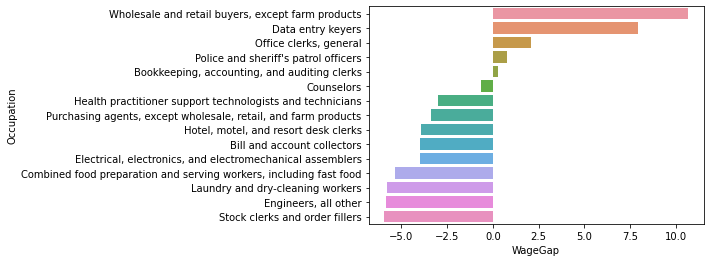

In [107]:
sns.barplot(data = DataSet.reset_index().sort_values(by = 'WageGap', ascending = False)[:15] ,x = 'WageGap', y ='Occupation')